In [13]:
import os

import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
# Path to test directory
test_data_dir = "test"
# Path to train directory
train_data_dir = "train"

<AxesSubplot:>

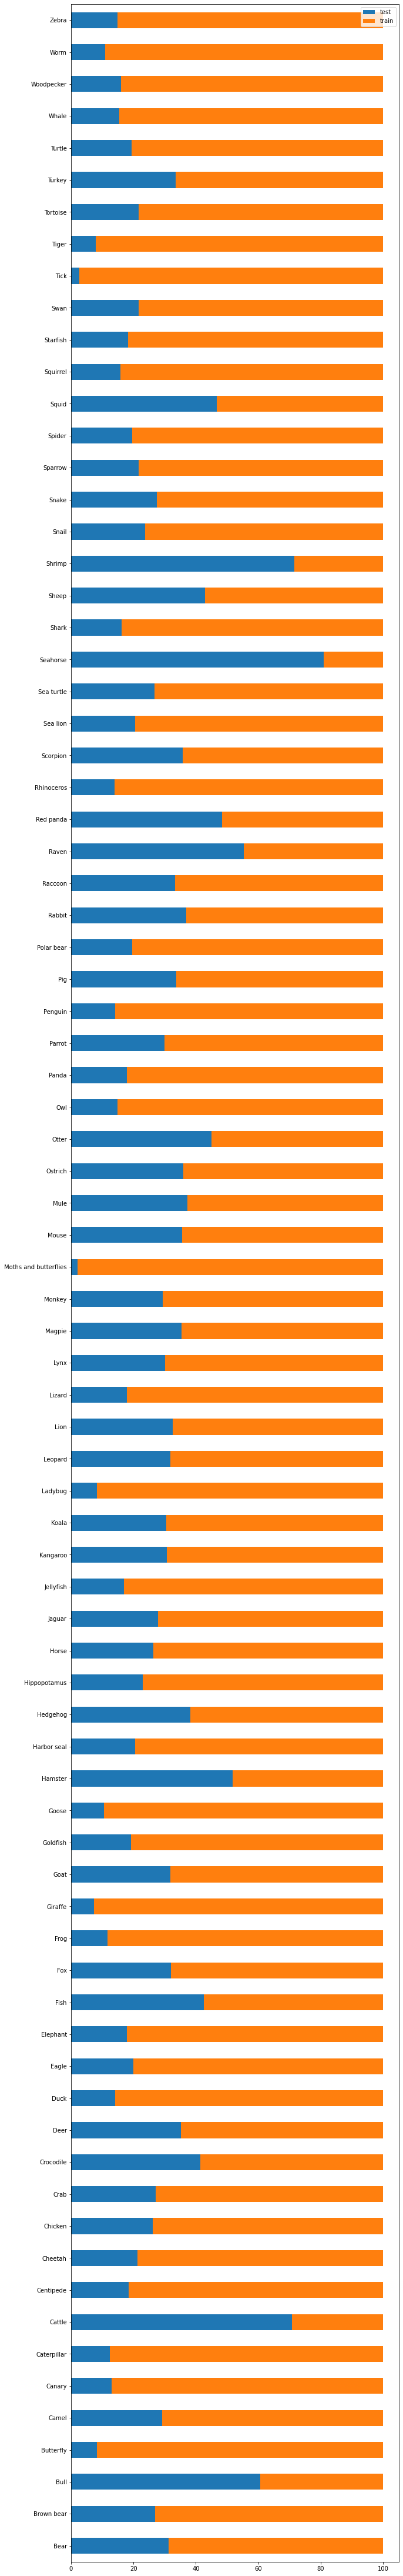

In [3]:
# Access all animal class names present for training and testing
class_names = os.listdir(train_data_dir)

animal_values = []
test_values = []
train_values = []

for name in class_names:
    test_subdirectory_path = os.path.join(test_data_dir, name)
    train_subdirectory_path = os.path.join(train_data_dir, name)
    test_image_count, train_image_count = len(os.listdir(test_subdirectory_path)), len(
        os.listdir(train_subdirectory_path)
    )
    total_image_count = train_image_count + test_image_count
    test_percent = round((test_image_count / total_image_count) * 100, 2)
    train_percent = round((train_image_count / total_image_count) * 100, 2)

    # Update the lists with appropriate values
    animal_values.append(name)
    test_values.append(test_percent)
    train_values.append(train_percent)

# Create a Pandas Dataframe
df = pd.DataFrame({"test": test_values, "train": train_values}, index=animal_values)

# Plot the data
df.plot(
    kind="barh",
    stacked=True,
    figsize=(
        10,
        80,
    ),
)

In [4]:
batch_size = 32
img_height = 180
img_width = 180

train_image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255, zoom_range=0.1, rotation_range=0.1, horizontal_flip=True
)
test_image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)

train_datagen = train_image_data_generator.flow_from_directory(
    train_data_dir, batch_size=batch_size, class_mode="binary", target_size=(img_width, img_height)
)

test_datagen = test_image_data_generator.flow_from_directory(
    test_data_dir, batch_size=batch_size, class_mode="binary", target_size=(img_width, img_height)
)

Found 22566 images belonging to 80 classes.
Found 6505 images belonging to 80 classes.


In [5]:
animals_number = len(class_names)

# Create the model
model = tf.keras.Sequential(
     [
        tf.keras.layers.Conv2D(16, 3, activation="relu", padding="same", input_shape=(img_width, img_height, 3)),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(animals_number, name="outputs", activation="softmax"),
    ]
)

adam = tf.keras.optimizers.Adam()

model.compile(
    optimizer=adam, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"]
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 64)       0

In [7]:
epochs = 5
# Fit the model
history = model.fit(
    train_datagen,
    steps_per_epoch=(train_datagen.samples // batch_size),
    epochs=epochs,
    validation_data=test_datagen,
    validation_steps=(test_datagen.samples // batch_size),
)

Epoch 1/5


C:\Users\nofia\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


705/705 [==============================] - 806s 1s/step - loss: 3.7377 - accuracy: 0.1308 - val_loss: 4.0052 - val_accuracy: 0.1135
Epoch 2/5
705/705 [==============================] - 780s 1s/step - loss: 3.3897 - accuracy: 0.1843 - val_loss: 3.6202 - val_accuracy: 0.1673
Epoch 3/5
705/705 [==============================] - 764s 1s/step - loss: 3.1722 - accuracy: 0.2209 - val_loss: 3.6305 - val_accuracy: 0.1720
Epoch 4/5
705/705 [==============================] - 771s 1s/step - loss: 3.0005 - accuracy: 0.2514 - val_loss: 3.4666 - val_accuracy: 0.1950
Epoch 5/5
705/705 [==============================] - 767s 1s/step - loss: 2.8420 - accuracy: 0.2786 - val_loss: 3.3908 - val_accuracy: 0.2075


In [8]:
epochs_range = range(epochs)

training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a pd Dataframe for accuracy
acc_df = pd.DataFrame({"Training Accuracy":training_acc, "Validation Accuracy":validation_acc}, index=epochs_range)
# Create a pd Dataframe for loss
loss_df = pd.DataFrame({"Training Loss":training_loss, "Validation Loss":validation_loss}, index=epochs_range)

<AxesSubplot:>

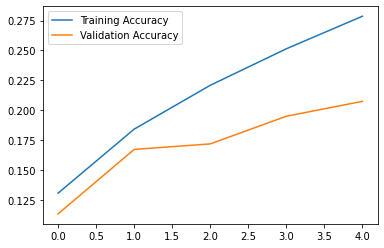

In [9]:


# Plot Accuracy
acc_df.plot()



<AxesSubplot:>

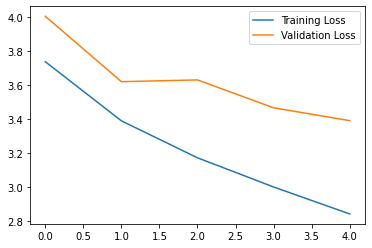

In [10]:


# Plot Loss
loss_df.plot()



In [11]:
# Save the entire model (architecture, weights, and optimizer state) 
model.save("animal_detection_model")
# Save only the weights of the model
model.save_weights("animal_detection_model_weights.h5")

INFO:tensorflow:Assets written to: animal_detection_model\assets


INFO:tensorflow:Assets written to: animal_detection_model\assets


In [14]:
butterfly_url = "https://www.freepnglogos.com/uploads/butterfly-png/flying-butterfly-png-transparent-background-4.png"
butterfly_path = tf.keras.utils.get_file('Queen_butterfly', origin=butterfly_url)

img = tf.keras.utils.load_img(
    butterfly_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 33ms/step
This image most likely belongs to Butterfly with a 3.33 percent confidence.


In [15]:
## Recommendation: Increase the number pf epochs during training in order to increase the accuracy as it is currently :-(